# DSCI 235 Final Assignment

Data Source: https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset

Github: https://github.com/ecreagar/DSCI235

### Project Description

We’ve often been told that a lot of Pop music sounds the same and is “formulaic”. To examine this question, I found a dataset containing metrics of 41,106 songs from 1960 to 2015. The dataset contains basic musical metrics such as beats per minute, tempo, key, time signature, and song length, as well as other categories compiled by Spotify’s web API that contains metrics like instrumental-ness, danceability, and energy. With this data, I am intending to answer questions about how pop music can be categorized, what factors are most instrumental in making a song a pop-song, and what songs follow this mold best. Specifically, I intend to answer the following questions:

***

<u>
In this project, we'll attempt to answer the following questions: 
</u>

1) Are hit songs different than non-hit songs?

2) What are the best predictors for what will become a hit song?

3) How well do these predictors separate hit songs from non-hit songs? What is the 'ideal' pop song according to our predictors?

4) How has popular music changed through the last 50 years?

<u>***Note: Information about the dataset used and a link to the data can be found at the bottom of the notebook.***</u>


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%autosave 60

Autosaving every 60 seconds


In [4]:
sixties = pd.read_csv('https://raw.githubusercontent.com/ecreagar/DSCI235/master/the-spotify-hit-predictor-dataset/dataset-of-60s.csv')
seventies = pd.read_csv('https://raw.githubusercontent.com/ecreagar/DSCI235/master/the-spotify-hit-predictor-dataset/dataset-of-70s.csv')
eighties = pd.read_csv('https://raw.githubusercontent.com/ecreagar/DSCI235/master/the-spotify-hit-predictor-dataset/dataset-of-80s.csv')
nineties = pd.read_csv('https://raw.githubusercontent.com/ecreagar/DSCI235/master/the-spotify-hit-predictor-dataset/dataset-of-90s.csv')
thousands = pd.read_csv('https://raw.githubusercontent.com/ecreagar/DSCI235/master/the-spotify-hit-predictor-dataset/dataset-of-00s.csv')
tens = pd.read_csv('https://raw.githubusercontent.com/ecreagar/DSCI235/master/the-spotify-hit-predictor-dataset/dataset-of-10s.csv')

sixties["year"]=1960
seventies['year']=1970
eighties['year']=1980
nineties['year']=1990
thousands['year']=2000
tens['year']=2010

songs = pd.concat([sixties,seventies,eighties,nineties,thousands,tens], ignore_index=False)
songs

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,1960
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,1960
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,1960
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,1960
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,2010
6394,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,2010
6395,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,2010
6396,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,2010


Seperate the data into two data frames - one for songs that reached the top 100 charts and one for those that didn't. In this project, we'll call those hits and flops (consistant with the naming system from the data provider on kaggle).

In [5]:
hits = songs.loc[songs.target==1]
flops = songs.loc[songs.target==0]

# Part 1: Are hit songs different than non-hit songs?

How can we seperate hit songs from non-hit songs? For this question, we'll be using a subset of the data - songs only from the 2000's and 2010's - in order to try to cut down on the within group variation (which we'll explore more in part 4). We'll examine the data for patterns and find out what categories tell us the most about how hit songs are different than other songs.
In this experiment, I will **not** be exploring whether or not we can *statistically* conclude differences between hits and flops through examination of t-tests or p-values. So I'll examine the data, but I'll also be careful about the conclusions.

In [6]:
recentTracks = pd.concat([thousands,tens])
recentHits = recentTracks.loc[recentTracks.target==1]
recentFlops = recentTracks.loc[recentTracks.target==0]

Create a dataframe containing the means and standard errors of each column, seperated by hits and flops.

In [19]:
recentTrackData = pd.DataFrame(recentHits.mean(axis=0),columns=["Hits Mean"])
recentTrackData["Hits Standard Dev."] = recentHits.std(axis=0)
recentTrackData["Flops Mean"] = recentFlops.mean(axis = 0)
recentTrackData["Flop Standard Dev."] = recentFlops.std(axis=0)
recentTrackData

,Hits Mean,Hits Standard Dev.,Flops Mean,Flop Standard Dev.
danceability,0.636089,0.145602,0.476086,0.197369
energy,0.697796,0.166211,0.663324,0.294430
key,5.282967,3.592160,5.277262,3.580127
loudness,-5.780778,2.125671,-9.264301,6.551211
mode,0.675306,0.468299,0.615322,0.486559
speechiness,0.102863,0.103535,0.087757,0.087623
acousticness,0.155394,0.194868,0.276018,0.361651
instrumentalness,0.007397,0.059600,0.309429,0.379286
liveness,0.185154,0.144808,0.207711,0.180757
valence,0.522516,0.221928,0.401828,0.263109


Let's visualize this data and see if we can find any obvious differences. The plots are split up to account for the different scales of variables.

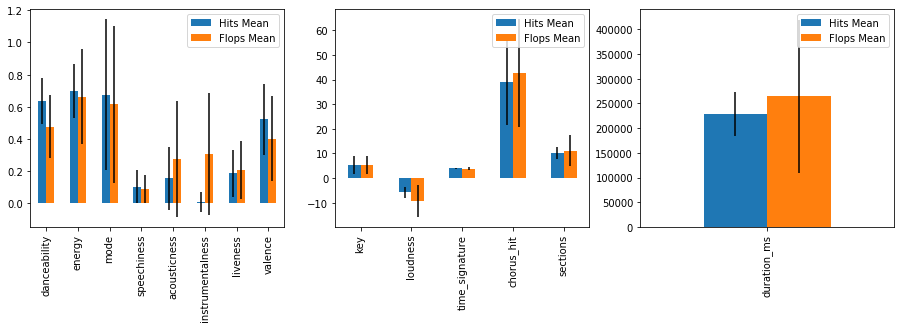

In [89]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
recentTrackData[['Hits Mean', 'Flops Mean']].drop(['key','loudness','tempo','duration_ms','time_signature',
                                                   'chorus_hit','sections','target','year']).plot(kind='bar', yerr=recentTrackData[['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                                           drop(['key','loudness','tempo','duration_ms','time_signature','chorus_hit','sections','target','year']).
                                                                                           values.T, alpha = 1,error_kw=dict(ecolor='k'),ax=ax1);
recentTrackData[['Hits Mean', 'Flops Mean']].drop(['danceability','energy','mode','speechiness','acousticness','year',
                                                   'instrumentalness','liveness','valence','duration_ms','tempo',
                                                   'target']).plot(kind='bar', yerr=recentTrackData[['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                   drop(['danceability','energy','mode','speechiness','acousticness','year',
                                                                         'instrumentalness','liveness','valence','duration_ms','tempo','target']).
                                                                   values.T, alpha = 1,error_kw=dict(ecolor='k'),ax=ax2);
recentTrackData[['Hits Mean', 'Flops Mean']].drop(['danceability','energy','mode','speechiness','acousticness','year',
                                                   'instrumentalness','liveness','valence','tempo',
                                                   'target','key','loudness','tempo','time_signature',
                                                   'chorus_hit','sections']).plot(kind='bar', yerr=recentTrackData[['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                   drop(['danceability','energy','mode','speechiness','acousticness','year',
                                                                         'instrumentalness','liveness','valence','tempo','target','key','loudness','tempo','time_signature',
                                                   'chorus_hit','sections']).
                                                                   values.T, alpha = 1,error_kw=dict(ecolor='k'),ax=ax3);

fig.subplots_adjust(left=1,right=3)


#### <u>We notice a few things from the plots above:</u>
 - **There appear to be differences in the means of most categories**. However, since we are not investigating these differences statistically, we'll be careful about concluding that there really *are* differences.
 - **The error margins for the hits are almost all smaller than the error margins for the flops.** What does this tell us? Hit music may not all be the same, but songs that become hits are more like each other than songs that don't become hits.
 - **Some categories appear to have larger differences than others**. From this, we can say with confidence that hit songs are not completely different than non-hit songs, but they do appear to differ in some ways.
 
For interest's sake, what do these plots look like for data for every song since 1960?


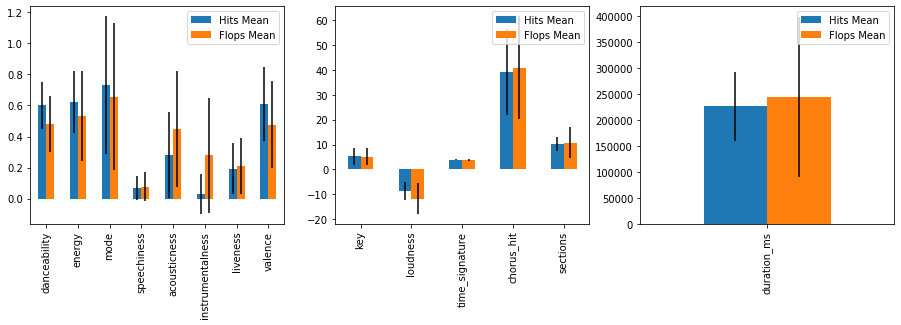

In [90]:
trackData = pd.DataFrame(hits.mean(axis=0),columns=["Hits Mean"])
trackData["Hits Standard Dev."] = hits.std(axis=0)
trackData["Flops Mean"] = flops.mean(axis = 0)
trackData["Flop Standard Dev."] = flops.std(axis=0)

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
trackData[['Hits Mean', 'Flops Mean']].drop(['key','loudness','tempo','duration_ms','time_signature',
                                                   'chorus_hit','sections','target','year']).plot(kind='bar', yerr=trackData[['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                                           drop(['key','loudness','tempo','duration_ms','time_signature','chorus_hit','sections','target','year']).
                                                                                           values.T, alpha = 1,error_kw=dict(ecolor='k'),ax=ax1);
trackData[['Hits Mean', 'Flops Mean']].drop(['danceability','energy','mode','speechiness','acousticness',
                                                   'instrumentalness','liveness','valence','duration_ms','tempo',
                                                   'target','year']).plot(kind='bar', yerr=trackData[['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                   drop(['danceability','energy','mode','speechiness','acousticness','year',
                                                                         'instrumentalness','liveness','valence','duration_ms','tempo','target']).
                                                                   values.T, alpha = 1,error_kw=dict(ecolor='k'),ax=ax2);
trackData[['Hits Mean', 'Flops Mean']].drop(['danceability','energy','mode','speechiness','acousticness','year',
                                                   'instrumentalness','liveness','valence','tempo',
                                                   'target','key','loudness','tempo','time_signature',
                                                   'chorus_hit','sections']).plot(kind='bar', yerr=trackData[['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                   drop(['danceability','energy','mode','speechiness','acousticness','year',
                                                                         'instrumentalness','liveness','valence','tempo','target','key','loudness','tempo','time_signature',
                                                   'chorus_hit','sections']).
                                                                   values.T, alpha = 1,error_kw=dict(ecolor='k'),ax=ax3);

fig.subplots_adjust(left=1,right=3)

The plots are similar, but there is an obvious increase in variability as we would expect.

**We conclude Part 1 in saying that yes, there are differences in songs that become hits and songs that don't**, at least in the data examined between 2000 and 2015. These differences bay not be completely quantifiable without the use of more statistics and mathematics, but differences are evident from the plots and in the means and error margins.
***
To continue our analysis, let's examine where the largest differences lie between hit songs and non hit songs.

# Part 2: What are the biggest differences between hit songs and non-hit songs?

To examine this question, we'll stick with our data sets of songs only after 2000. This will introduce less variability within groups and give us answers pertaining to the songs of this generation.

To start, we'll find the categories with the biggest percentage differences between their means, accounting for standard error. The formula we'll use for this is:

$$\frac{\left|\frac{\text{mean}(hit) - \text{mean}(flop)}{\text{mean}(hit)}\right|}{\frac{\text{se}(hit)}{\text{mean}(hit)}+ \frac{\text{se}(flop)}{\text{mean}(flop)}}$$

This formula calculates the percentage change between the two means, then divides it by the standard error over mean of both terms, accounting for both error and scale of variable by giving favor to columns with larger difference between means and smaller standard error.

Create a new column in the dataset and sort by Percent Change:

In [21]:
recentTrackData["Percent Change"] = abs(((recentTrackData["Hits Mean"] - recentTrackData["Flops Mean"]) / recentTrackData["Hits Mean"])/((recentTrackData["Hits Standard Dev."]/recentTrackData["Hits Mean"])+(recentTrackData["Flop Standard Dev."]/recentTrackData["Flops Mean"]))).round(5)
recentTrackData.sort_values("Percent Change", ascending = False).drop(["year","target"])

,Hits Mean,Hits Standard Dev.,Flops Mean,Flop Standard Dev.,Percent Change
instrumentalness,0.007397,0.059600,0.309429,0.379286,4.39845
loudness,-5.780778,2.125671,-9.264301,6.551211,0.56064
danceability,0.636089,0.145602,0.476086,0.197369,0.39092
acousticness,0.155394,0.194868,0.276018,0.361651,0.30272
valence,0.522516,0.221928,0.401828,0.263109,0.21396
duration_ms,229289.262592,44476.049286,264665.336756,154625.947593,0.19826
time_signature,3.974735,0.262007,3.870905,0.480761,0.13740
sections,10.170008,2.461165,11.171638,6.349744,0.12153
chorus_hit,39.109636,17.656912,42.665666,21.762867,0.09456
liveness,0.185154,0.144808,0.207711,0.180757,0.07373


*Note: we could sort this backwards to analyze the ways in which hit songs and non-hit songs are most similar. We would note that there is not much difference between then categories in key, tempo, or mode.*

***

Now, let's plot the top 5 in this category to visualize ther differences.

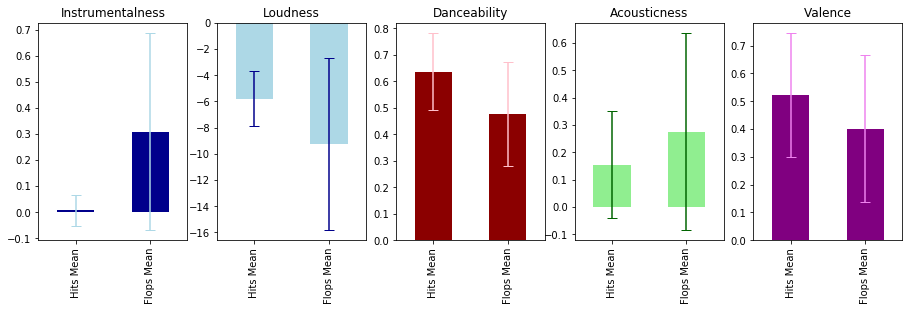

In [93]:
fig, (ax1, ax2,ax3, ax4, ax5) = plt.subplots(1, 5)
recentTrackData.loc['danceability'][['Hits Mean','Flops Mean']].plot(kind='bar',color='DarkRed', ax=ax3,capsize=5,
                                                                     title = "Danceability", subplots = False,
                                                                     yerr = recentTrackData.loc['danceability'][['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                     values.T,error_kw=dict(ecolor='Pink'));
recentTrackData.loc['instrumentalness'][['Hits Mean','Flops Mean']].plot(kind='bar',color='DarkBlue', ax=ax1,capsize=5,
                                                                         title="Instrumentalness", subplots = False,
                                                                         yerr = recentTrackData.loc['instrumentalness'][['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                         values.T,error_kw=dict(ecolor='LightBlue'));
recentTrackData.loc['acousticness'][['Hits Mean','Flops Mean']].plot(kind='bar',color='LightGreen',ax=ax4,capsize=5,
                                                                     title="Acousticness", subplots = False,
                                                                     yerr = recentTrackData.loc['acousticness'][['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                     values.T,error_kw=dict(ecolor='DarkGreen'));
recentTrackData.loc['valence'][['Hits Mean','Flops Mean']].plot(kind='bar',color='Purple',ax=ax5,capsize=5,
                                                                title="Valence", subplots = False,
                                                                yerr = recentTrackData.loc['valence'][['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                values.T,error_kw=dict(ecolor='Violet'));
recentTrackData.loc['loudness'][['Hits Mean','Flops Mean']].plot(kind='bar',color='LightBlue',ax=ax2,capsize=5,
                                                                 title="Loudness", subplots = False,
                                                                 yerr = recentTrackData.loc['loudness'][['Hits Standard Dev.', 'Flop Standard Dev.']].
                                                                 values.T,error_kw=dict(ecolor='DarkBlue'));
fig.subplots_adjust(left=1,right=3)

Above are the 5 categories that show the biggest difference between Hits and Flops. These categories all make sense; in fact, they might be 5 of the categories we would most expect to show differences. Based on the standard error margins, it appears that the three most seperable categories are **Intrumentalness**, **Loudness** and **Danceability**.


#### So, what kind of interesting things can we say about the differences hit songs vs. non hit songs?
 - First, we can say that hit songs appear to be **more instrumental** than non-hit songs. Although there is a large error spread of non-hit songs, we can notice that the mean value for hit songs is close to 0, with a small error margin. This tells us that although non-hit songs range from intrumental to non-instrumental, hit songs are almost never instrumental. From the variable descriptions: "The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content". So, almost all hit songs contain vocal content, while non-hit songs have a larger range from vocal content to no vocal content.
 - Another conclusion we can make from this data set is that hit songs appear to be **louder** than non-hit songs on average. They have a mean of about 3.5 dB higher, and have a standard error of about 4.5 dB less. This may help to explain why pop music is sometime described as headache-inducing. While non-hit songs range from quieter to louder, hit songs have a smaller range around their mean, which is louder. *Note: dB levels are negative because when dealing with sound recording, 0 dB usually refers to the loudest level before distortion begins. More reading can be done [here](https://sound.stackexchange.com/a/25533)*.
 - Finally, we can observe that hit songs appear to have a higher average of **danceability** in our data set. From the data description: "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity". The data for hits and non-hits appear to have similar standard error ranges, but the mean of hit songs is higher by about .15. This is a percentage value, so in this data set, danceability was about 15% higher for hit songs than non-hit songs on average.

We conclude Part 2 with the answers above - **the most obvious seperators in this dataset between hits and non-hit songs are instrumentalness, volume, and danceability**. If we wanted to develop predictors that would best help us decide whether a song would become a hit, these categories would be a good place to start, and if we were looking to write a hit song we would likely want to make sure we were within the standard error ranges of these categories as well. 


# Part 3: Does our "formula" work? Which songs best fit our pop music formula?

Now that we've learned more about the different categories, let's see how well we can distinguish hits vs. flops by using the means and standard deviations of the hits as "ranges" for what makes a hit.

Create columns in the DataFrame for the "ranges" of hits using the formula:

$$(mean - st  dev,mean+stdev)$$

In [154]:
recentTrackData["Range Low"] = recentTrackData["Hits Mean"] - recentTrackData["Hits Standard Dev."]
recentTrackData["Range High"] = recentTrackData["Hits Mean"] + recentTrackData["Hits Standard Dev."]
recentTrackData[["Range Low","Hits Mean","Range High"]].drop(["year","target"])

,Range Low,Hits Mean,Range High
danceability,0.490488,0.636089,0.781691
energy,0.531586,0.697796,0.864007
key,1.690806,5.282967,8.875127
loudness,-7.906449,-5.780778,-3.655108
mode,0.207007,0.675306,1.143604
speechiness,-0.000671,0.102863,0.206398
acousticness,-0.039474,0.155394,0.350262
instrumentalness,-0.052203,0.007397,0.066998
liveness,0.040345,0.185154,0.329962
valence,0.300588,0.522516,0.744444


***

Now, using the 5 categories from Part 2 that we found to show the biggest seperation between hits and flops, find all songs from the 2000's and after that fit inside ranges.

In [155]:
inSpecificRanges = recentTracks.loc[(recentTracks.danceability > recentTrackData.loc['danceability']["Range Low"]) & (recentTracks.danceability < recentTrackData.loc['danceability']["Range High"]) &
(recentTracks.loudness > recentTrackData.loc['loudness']["Range Low"]) & (recentTracks.loudness < recentTrackData.loc['loudness']["Range High"]) &
(recentTracks.acousticness > recentTrackData.loc['acousticness']["Range Low"]) & (recentTracks.acousticness < recentTrackData.loc['acousticness']["Range High"]) &
(recentTracks.instrumentalness > recentTrackData.loc['instrumentalness']["Range Low"]) & (recentTracks.instrumentalness < recentTrackData.loc['instrumentalness']["Range High"]) &
(recentTracks.valence > recentTrackData.loc['valence']["Range Low"]) & (recentTracks.valence < recentTrackData.loc['valence']["Range High"])]
inSpecificRanges.head()


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1,2000
11,Amarillo Sky,Jason Aldean,spotify:track:0axUHkhMMY0YSC1jFBVWqv,0.491,0.776,2,-3.887,1,0.0393,0.314000,0.000000,0.1460,0.428,154.988,202547,4,37.86861,9,1,2000
16,Daddy Won't Sell The Farm,Montgomery Gentry,spotify:track:2Wt173KM9i97KSB52qCuqj,0.708,0.728,7,-7.039,1,0.0298,0.011000,0.000023,0.0556,0.704,119.881,258640,4,33.81641,15,1,2000
17,Move Along,The All-American Rejects,spotify:track:2l57cfmCnOkwNX1tky02n1,0.518,0.916,3,-3.858,1,0.0454,0.000148,0.000000,0.2910,0.646,109.864,238880,4,19.81215,10,1,2000
34,Bed,J. Holiday,spotify:track:6TlRNJaezOdzdECnQeRuMM,0.684,0.606,5,-7.268,0,0.0504,0.170000,0.000000,0.0580,0.723,127.901,275107,4,41.49527,13,1,2000



What percent of the songs in these ranges are hits, and what percent are not?

In [156]:
print("Hits:",len(inSpecificRanges[inSpecificRanges.target == 1]),round((len(inSpecificRanges[inSpecificRanges.target == 1])/len(inSpecificRanges)),3)*100,"%")
print("Flops:",len(inSpecificRanges[inSpecificRanges.target == 0]),round((len(inSpecificRanges[inSpecificRanges.target == 0])/len(inSpecificRanges)),3)*100,"%")


Hits: 1751 77.8 %
Flops: 499 22.2 %


So, we've seperated hits from flops from all songs after the 2000's with 77.8% accuracy. What percentage of the hits from this time period did we extract using this method?

In [157]:
print(len(inSpecificRanges[inSpecificRanges.target == 1]),"out of",len(recentHits),",",round((len(inSpecificRanges[inSpecificRanges.target == 1])/len(recentHits)),3))


1751 out of 6135 , 0.285


Using this range method, we successfully selected about 28.5% of the hits. This may seem low, but this means that 28.5% of all songs that reached the top 100 charts since 2000 fall into the ranges we've created from 5 categories of music. Looking at it this way, this seems like a fairly good way to pick out songs.

If we run this code on all of the songs since the 1960's, is it still such a good estimation?

In [158]:
allInSpecificRanges = songs.loc[(songs.danceability > recentTrackData.loc['danceability']["Range Low"]) & (songs.danceability < recentTrackData.loc['danceability']["Range High"]) &
(songs.loudness > recentTrackData.loc['loudness']["Range Low"]) & (songs.loudness < recentTrackData.loc['loudness']["Range High"]) &
(songs.acousticness > recentTrackData.loc['acousticness']["Range Low"]) & (songs.acousticness < recentTrackData.loc['acousticness']["Range High"]) &
(songs.instrumentalness > recentTrackData.loc['instrumentalness']["Range Low"]) & (songs.instrumentalness < recentTrackData.loc['instrumentalness']["Range High"]) &
(songs.valence > recentTrackData.loc['valence']["Range Low"]) & (songs.valence < recentTrackData.loc['valence']["Range High"])]
allInSpecificRanges

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
year,,,,,,,,,,,,,,,,,,,
1960,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,0.511,0.603,2,-7.637,1,0.0280,0.03850,0.000002,0.1420,0.685,128.336,157293,4,43.36534,9,1
1960,Españolito,Joan Manuel Serrat,spotify:track:1QxwjJhroDhlT7BC77Rlbt,0.555,0.658,0,-4.487,1,0.0445,0.16400,0.000000,0.0363,0.440,120.911,77907,4,40.76595,4,0
1960,Na Na Hey Hey Kiss Him Goodbye,Steam,spotify:track:1mrSHPNTDdMkXpR4BiSiD7,0.637,0.916,7,-6.950,1,0.0458,0.01390,0.000023,0.2100,0.506,114.987,247173,4,43.50466,8,1
1960,Don't Make Promises - Bonus Track,Krokodil,spotify:track:2wmhJQqUS4HeMOzieGjZPD,0.567,0.927,2,-5.687,1,0.0824,0.12600,0.000196,0.1230,0.462,113.898,242600,4,51.86658,13,0
1960,Um Rostinho de Criança (I Don't Care What They...,Leno e Lilian,spotify:track:50Rozbs2JsPiitEfqCjUpC,0.620,0.747,4,-6.326,0,0.0271,0.08860,0.000046,0.3350,0.667,115.251,176960,4,47.83454,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,Metal Machine,U.D.O.,spotify:track:4MfBk2SvHdVjst7B1Kmcxg,0.565,0.853,2,-6.008,1,0.0289,0.00053,0.000099,0.3460,0.501,110.008,286093,4,47.76517,15,0
2010,Whiskey In My Water,Tyler Farr,spotify:track:5E4CJfa6yZNGSKVFSUgaBt,0.526,0.872,7,-5.079,1,0.0428,0.24500,0.000000,0.2430,0.583,153.929,188147,4,17.64029,9,1
2010,Tear In My Heart,twenty one pilots,spotify:track:3bnVBN67NBEzedqQuWrpP4,0.655,0.632,2,-4.802,1,0.0489,0.01890,0.000000,0.0722,0.447,120.113,188493,4,51.52804,8,1


In [159]:
print("Hits:",len(allInSpecificRanges[allInSpecificRanges.target == 1]),round((len(allInSpecificRanges[allInSpecificRanges.target == 1])/len(allInSpecificRanges)),3),"%")
print("Flops:",len(allInSpecificRanges[allInSpecificRanges.target == 0]),round((len(allInSpecificRanges[allInSpecificRanges.target == 0])/len(allInSpecificRanges)),3),"%")

Hits: 2665 0.787 %
Flops: 722 0.213 %


By percentages, our model actually picks out hits better when we run it on all of the data. But, when we check how many of the hits we extracted from the total number of hits:

In [160]:
print(len(allInSpecificRanges[allInSpecificRanges.target == 1]),"out of",len(hits),",",round((len(allInSpecificRanges[allInSpecificRanges.target == 1])/len(hits)),3))

2665 out of 20553 , 0.13


We can see that we did not pull as high of a percentage of the hits out of the full data set using this model.

*** 

To find which songs are closest to the pop song "formula" we've created, we'll narrow the ranges by using a new model: 

$$(mean - \frac{st  dev}{4},mean+ \frac{stdev}{4})$$

The remaining songs will be the ones closest to the means of our top 5 categories, or the ones that "best fit" the formula we've created.


In [166]:
recentTrackData["Smaller Range Low"] = recentTrackData["Hits Mean"] - (recentTrackData["Hits Standard Dev."]/4)
recentTrackData["Smaller Range High"] = recentTrackData["Hits Mean"] + (recentTrackData["Hits Standard Dev."]/4)
recentTrackData[["Smaller Range Low","Hits Mean","Smaller Range High"]].drop(["year","target"])

,Smaller Range Low,Hits Mean,Smaller Range High
danceability,0.599689,0.636089,0.672490
energy,0.656244,0.697796,0.739349
key,4.384927,5.282967,6.181007
loudness,-6.312196,-5.780778,-5.249361
mode,0.558231,0.675306,0.792380
speechiness,0.076980,0.102863,0.128747
acousticness,0.106677,0.155394,0.204111
instrumentalness,-0.007503,0.007397,0.022298
liveness,0.148951,0.185154,0.221356
valence,0.467034,0.522516,0.577998


In [163]:
inSmallerRanges = recentTracks.loc[(recentTracks.danceability > recentTrackData.loc['danceability']["Smaller Range Low"]) & (recentTracks.danceability < recentTrackData.loc['danceability']["Smaller Range High"]) &
(recentTracks.loudness > recentTrackData.loc['loudness']["Smaller Range Low"]) & (recentTracks.loudness < recentTrackData.loc['loudness']["Smaller Range High"]) &
(recentTracks.acousticness > recentTrackData.loc['acousticness']["Smaller Range Low"]) & (recentTracks.acousticness < recentTrackData.loc['acousticness']["Smaller Range High"]) &
(recentTracks.instrumentalness > recentTrackData.loc['instrumentalness']["Smaller Range Low"]) & (recentTracks.instrumentalness < recentTrackData.loc['instrumentalness']["Smaller Range High"]) &
(recentTracks.valence > recentTrackData.loc['valence']["Smaller Range Low"]) & (recentTracks.valence < recentTrackData.loc['valence']["Smaller Range High"])]
inSmallerRanges.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
2659,"Don't Say No, Just Say Yes",Avant,spotify:track:2rh1HEbkalvTKVhooKdePe,0.638,0.504,3,-5.641,0,0.0242,0.132,0.000091,0.0628,0.504,139.990,274667,4,51.45886,13,1,2000
5121,Kick Push,Lupe Fiasco,spotify:track:6nz35DNIzbtj5ztpDEcW1j,0.652,0.809,5,-5.276,1,0.1700,0.164,0.000000,0.1750,0.512,94.786,254466,4,27.92590,14,1,2000
2879,X,Chris Brown,spotify:track:2aCOTUTsSh9018q7nTsdjm,0.642,0.595,10,-5.909,1,0.1040,0.119,0.000000,0.1990,0.535,98.033,249255,4,49.81872,13,1,2010
4118,Wake Up,Fetty Wap,spotify:track:6BOtDFg6GJm0rPUDuNmx57,0.647,0.673,5,-5.992,1,0.1760,0.172,0.000000,0.2230,0.527,179.971,224000,4,32.68943,13,1,2010
4797,"Gone, Gone, Gone",Phillip Phillips,spotify:track:5L79aNYCTKiZq7vaOElXYj,0.664,0.642,6,-5.961,1,0.0380,0.129,0.000000,0.1140,0.501,118.002,209693,4,46.97496,9,1,2010


The 5 songs above are the ones that best fit our pop song model from the 2000's and after. All of them ended up making the top charts. If we run this model on all of the data:

In [164]:
allInSmallerRanges = songs.loc[(songs.danceability > recentTrackData.loc['danceability']["Smaller Range Low"]) & (songs.danceability < recentTrackData.loc['danceability']["Smaller Range High"]) &
(songs.loudness > recentTrackData.loc['loudness']["Smaller Range Low"]) & (songs.loudness < recentTrackData.loc['loudness']["Smaller Range High"]) &
(songs.acousticness > recentTrackData.loc['acousticness']["Smaller Range Low"]) & (songs.acousticness < recentTrackData.loc['acousticness']["Smaller Range High"]) &
(songs.instrumentalness > recentTrackData.loc['instrumentalness']["Smaller Range Low"]) & (songs.instrumentalness < recentTrackData.loc['instrumentalness']["Smaller Range High"]) &
(songs.valence > recentTrackData.loc['valence']["Smaller Range Low"]) & (songs.valence < recentTrackData.loc['valence']["Smaller Range High"])]
allInSmallerRanges

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
year,,,,,,,,,,,,,,,,,,,
1960,Make Believe,Wind,spotify:track:1XFZKlM2dsCuE4HytMmm49,0.623,0.628,9,-5.663,1,0.0323,0.107,0.003010,0.0731,0.527,114.058,174520,4,48.80916,9,1
1960,Meu Sonho de Amor,Leno e Lilian,spotify:track:0B4cvoNEavcyKMkKRQIb6w,0.607,0.738,0,-6.045,1,0.0370,0.133,0.000555,0.0438,0.550,117.392,186093,4,59.08066,7,0
1970,Rolene,Moon Martin,spotify:track:6OPRgLCf7wSWe4bbxIYraH,0.647,0.689,0,-6.288,1,0.0431,0.194,0.000016,0.0772,0.562,137.057,216067,4,44.98618,9,1
1970,Just Too Many People,Melissa Manchester,spotify:track:0G5nSGB8FrFrZC2MdwlV6f,0.614,0.820,5,-6.303,1,0.0433,0.151,0.000001,0.1380,0.538,123.754,209160,4,41.61432,7,1
1970,Tried To Love,Peter Frampton,spotify:track:4Ot4uHTU1MpxrBGtPFDhkS,0.652,0.772,2,-6.058,1,0.0312,0.185,0.000034,0.0945,0.501,110.136,267600,4,63.95982,11,1
1980,¿Hasta Cuando?,Beatriz Adriana,spotify:track:1lQbMmx22ZRWGDYT9iYnqW,0.633,0.481,4,-5.835,0,0.0245,0.195,0.000778,0.3490,0.570,106.841,202240,4,62.33548,8,0
1990,Go Away,Lorrie Morgan,spotify:track:1A0ztUdCDMZjIeeJjXLgDL,0.623,0.709,2,-5.824,1,0.0334,0.113,0.000000,0.3610,0.544,107.343,169333,4,25.91965,7,1
1990,Breakfast At Tiffany's,Deep Blue Something,spotify:track:1uzWOoJdADfstQuFtQFTUn,0.622,0.829,2,-5.548,1,0.0290,0.110,0.000000,0.0954,0.539,110.367,257373,4,43.37023,13,1
2000,"Don't Say No, Just Say Yes",Avant,spotify:track:2rh1HEbkalvTKVhooKdePe,0.638,0.504,3,-5.641,0,0.0242,0.132,0.000091,0.0628,0.504,139.990,274667,4,51.45886,13,1


We end up adding quite a few songs, even though this is "extrapolating" in a way, since we created this pop song model from only songs after 2000. Note that using all songs, we pulled two songs that did not end up making the top 100 lists (the 0's in the **target** column).

***

In conclusion of part 3, by creating intervals based on the mean and standard deviations of categories, we were able to find songs that were closest to our "formula" for a pop song. Using the top 5 categories found in part 2, we were able to separate hit songs from flop songs in our data set of songs after 2000 with near 80 percent accuracy while selecting almost 30 percent of the total hits. By narrowing these intervals, we found the few songs that best fit our pop song formula from after 2000, as well as from all years in the data set. The 5 songs from after 2000 are shown below. All reached the top 100 list.

In [168]:
inSmallerRanges[["track","artist"]]

,track,artist
2659,"Don't Say No, Just Say Yes",Avant
5121,Kick Push,Lupe Fiasco
2879,X,Chris Brown
4118,Wake Up,Fetty Wap
4797,"Gone, Gone, Gone",Phillip Phillips


# Part 4: How has popular music changed from 1960 to now?

To explore how popular music has changed the most, we will use a similar process to how we separated hits from flops. First, we'll visualize all of the data, then find the ones with the largest change from 1960 to now. For this data set, we'll be using only the hit songs, since we really only want to explore how pop songs have changed and not music as a whole (and to minimize variation within each decade). First, we'll calculate means and standard deviations for every category for every decade, and put them into a dataframe.

In [171]:
songs = songs.set_index(["year"])

In [173]:
songsData = pd.DataFrame()
means = songs.loc[songs.target==1].mean(level=0)
means["type"]="mean"
means = means.reset_index()
std = songs.loc[songs.target==1].std(level=0)
std = std.reset_index()
std['type']='std'

songsData = pd.concat([means,std])
songsData = songsData.set_index(["year"])
songsData

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,type
year,,,,,,,,,,,,,,,,,
1960,0.530582,0.511152,5.140014,-10.449623,0.838926,0.049316,0.536790,0.050243,0.219162,0.663424,118.742690,165681.836843,3.841240,38.689844,8.288822,1.0,mean
1970,0.570370,0.584880,5.134690,-10.456478,0.763842,0.053141,0.341048,0.048343,0.193293,0.664852,119.704382,233918.058460,3.940252,39.377945,10.473088,1.0,mean
1980,0.624444,0.653031,5.289519,-9.876752,0.708454,0.046635,0.204579,0.028439,0.182619,0.657061,121.867801,257119.786335,3.971917,39.287307,11.336422,1.0,mean
1990,0.648769,0.657542,5.450725,-8.522604,0.660870,0.078152,0.169511,0.029814,0.179356,0.581617,117.806741,263748.270652,3.962681,40.018922,11.328623,1.0,mean
2000,0.630049,0.714608,5.260559,-5.677296,0.691076,0.097785,0.148008,0.008858,0.183907,0.553791,120.283592,238862.943801,3.970027,38.843723,10.476839,1.0,mean
2010,0.641633,0.682367,5.303532,-5.875753,0.660832,0.107524,0.162173,0.006057,0.186298,0.493813,123.524576,220502.664270,3.979056,39.353687,9.888403,1.0,mean
1960,0.146969,0.196718,3.499481,3.434263,0.367642,0.048173,0.269889,0.179934,0.175254,0.228923,28.940672,43013.233448,0.432770,16.547566,2.168565,0.0,std
1970,0.149094,0.197369,3.552236,3.342201,0.424775,0.048387,0.270915,0.158205,0.175339,0.228909,26.058584,83814.720047,0.282651,16.490315,3.391656,0.0,std
1980,0.138208,0.192987,3.623478,3.446200,0.454540,0.032172,0.212803,0.109922,0.167838,0.233132,24.439444,56402.323727,0.215445,16.926793,2.744506,0.0,std


Now, lets' visualize all of the data and check which categories look like they have the biggest changes.


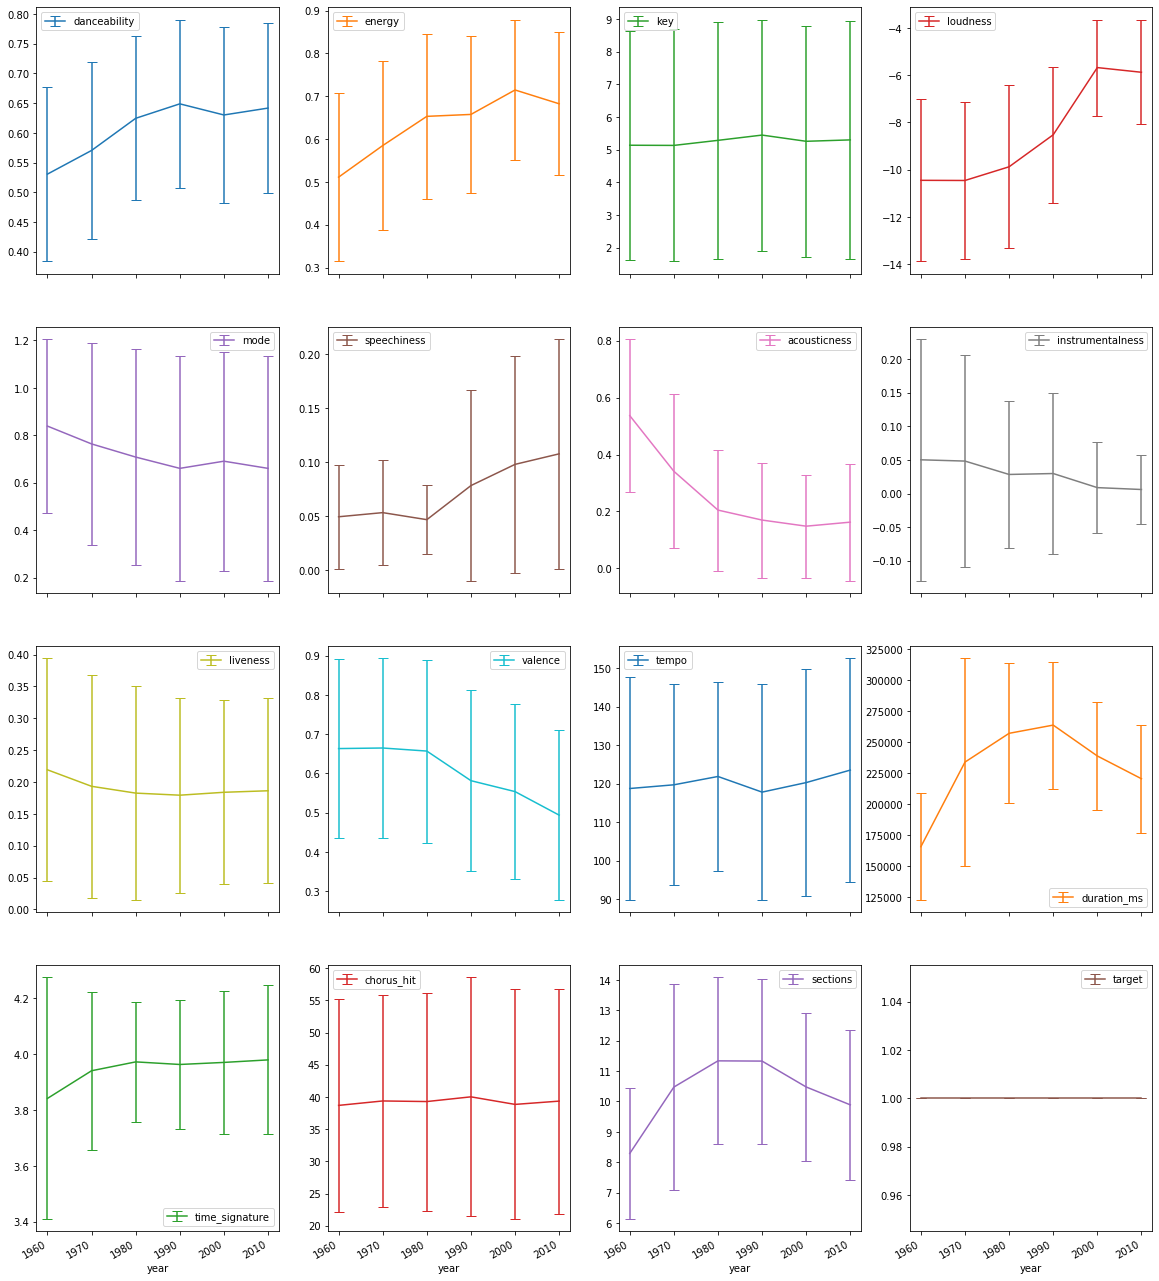

In [174]:
songsData[songsData.type=="mean"].plot(layout = (4,4),subplots=True,figsize=(20,25), yerr=songsData[songsData.type=="std"],capsize=5);


In the above plot, some categories stand out as showing obvious differences, like speechiness, acousticness, and loudness. Below, we'll calculate the percent change for each category from the 1960's to the 2010's to find which categories changed the most according to the data.

*Aside*: We can make some interesting observations from the plots above, even among the categories which do not show the most change. For instance:
 - There is a shrinking standard error in **time signature** and a lightly growing mean as we move from left to right. We can conclude from this that there were more songs in the 1960's with time signatures other than $\frac{4}{4}$, and in particular, pop songs were more likely to be in $\frac{3}{4}$ time.
 - The mean of **mode** is shrinking slightly from left to right, while the standard error appears to be growing or at least moving similarly. This tells us that *hit songs throughout time are more likely to be in minor keys than they were in 1960*.
 - The **duration** of songs has undergone quite a bit of change through the years. this is one of the only categories that shows change from left to right, then reverts back closer to the original value, showing that *the average length of songs got longer towards the 1980's, then shorter again towards the 2000's.* Unsurprisingly, the **sections** plot looks very similar.
   
***

What categories had the largest sum percent change?


In [182]:
abs(songsData.loc[songsData["type"]=="mean"].drop(columns=["type"]).pct_change().sum(axis=0)).sort_values(ascending=False)


instrumentalness    1.420308
speechiness         0.981778
acousticness        0.967364
loudness            0.490788
duration_ms         0.365600
energy              0.309337
valence             0.280534
mode                0.227237
sections            0.213911
danceability        0.198280
liveness            0.152755
tempo               0.040818
time_signature      0.035615
key                 0.032875
chorus_hit          0.017868
target              0.000000
dtype: float64

Plot the top 5 categories that showed the largest total percent change below.

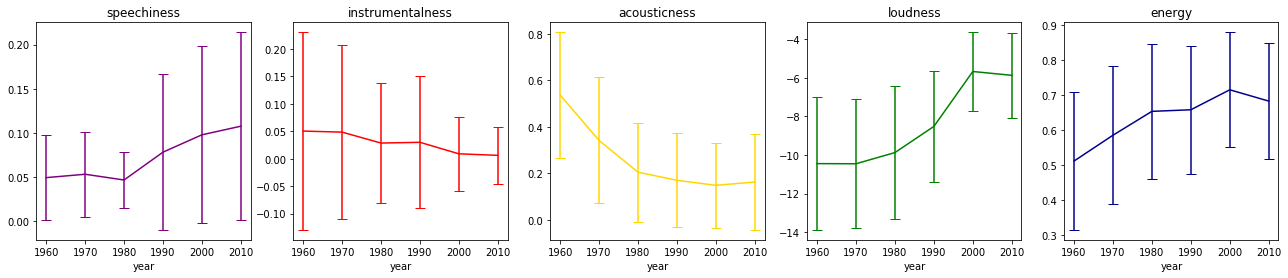

In [187]:
fig, (ax1, ax2,ax3, ax4,ax5) = plt.subplots(nrows=1, ncols=5)

songsData[songsData.type=="mean"]["instrumentalness"].plot(yerr=songsData.loc[songsData.type == 'std']["instrumentalness"],capsize=5,ax=ax2,title="instrumentalness",color="r");
songsData[songsData.type=="mean"]["acousticness"].plot(yerr=songsData.loc[songsData.type == 'std']["acousticness"],capsize=5,ax=ax3,title='acousticness',color="gold");
songsData[songsData.type=="mean"]["loudness"].plot(yerr=songsData.loc[songsData.type == 'std']["loudness"],capsize=5,ax=ax4,title='loudness',color="green");
songsData[songsData.type=="mean"]["energy"].plot(yerr=songsData.loc[songsData.type == 'std']["energy"],capsize=5,ax=ax5,title='energy',color="darkblue");
songsData[songsData.type=="mean"]["speechiness"].plot(yerr=songsData.loc[songsData.type == 'std']["speechiness"],capsize=5,ax=ax1,title='speechiness',color="purple");

fig.subplots_adjust(right=3)


These 5 categories tell the best story about how pop music has changed over the last 50 years. To conclude part 4, we'll analyze each of the changes:

 - **Speechiness** is the category that has changed the most over the last 50 years. From the data discription, "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value." As we can see in the plot, over time not only did the mean grow, but so did the deviation. This shows that more songs contained more spoken words over time. The growth of this category is likely due to rap music growing in the top charts. As we can see, the largest jump happens in the 1990's, which is when rap music first began to imerge as a popular genre [$^{[source]}$](https://www.theatlantic.com/culture/archive/2015/05/1991-the-most-important-year-in-music/392642/).
 
 - **Instrumentalness** is a category that "Predicts whether a track contains no vocals." Instrumentalness was never very high in the dataset, but from its starting point at around 5% of the songs, it has shrunk to almost 0 over the years with a much smaller deviation.
 
 - **Acousticness** is another category between 1 and 0, songs closer to 1 being more acoustic and songs closer to 0 being less acoustic. Our data shows that acousticness has decreased significantly from the 60's to the 10's. This tells us that pop songs today have much less of an acoustic presence, which would be expected due to the emergence of better music technology and accessability of electronic instruments.
 
 - **Loudness** is the category that showed the most difference between hit songs and non-hit songs. It also shows up in the top 5 for total percentage difference over the last 50 years. This shows that the loudness in pop music is not something that has always been true, but that the volume of pop music has actually risen over time. This phenomena is very well documented, and descibed in the Wikipedia Article [The Loudness War](https://en.wikipedia.org/wiki/Loudness_war).
 
 - **Energy**. Energy is an interesting category, because it initially shows an increase, but then a decrease from the 2000's to the 2010's. Nevertheless, it rounds off the top 5 largest percentage change categories.

# Conclusion

We've learned some interesting things from analyzing this dataset of over 41,000 hit and non-hit songs. In particular, we've leared that hit songs are different than non-hit songs on average; specifically, hit songs are louder, less instrumental, and more danceable on average than non-hit songs. Using these categories, we can separate hit songs from non hit songs with about 80% accuracy while selecting almost 30% of the total hit songs, showing that our "model" does a fairly good job at selecting which songs end up as hits and which don't. Using this model and shrinking the confidence interval, we can select the songs that best fit the model we've created, shown in the conclusion of part 3. Finally, we examined how music has changed from the 1960's to the 2010's. We found categories that have changed the most over time, and they included Speechiness, Instrumentalness, Acousticness, Loudness, and Energy. **In some ways, pop music is formulaic and is seperable from non-pop music.**

***

**Data:** Spotify hit predictor: https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset

### Data Category Description:
***

<div style="font-size: 12px">

    
    
**track** - The Name of the track.

**artist** - The Name of the first artist listed for the track.

**uri** - The resource identifier for the track.

**danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

**loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

**liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
valenceA measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
duration_msThe duration of the track in milliseconds.

**time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**chorus_hit** - This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track (in milliseconds). This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.

**sections** - The number of sections the particular track has. This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.

**target** - The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.
      The author's condition of a track being 'flop' is as follows:

        - The track must not appear in the 'hit' list of that decade.
        - The track's artist must not appear in the 'hit' list of that decade.
        - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
        - The track's genre must not have a song in the 'hit' list.
        - The genre list for the particular decades are as follows:
        - The track must have 'US' as one of its markets.
 
 <div \>